<a href="https://colab.research.google.com/github/Nobel712/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
x=df.drop('Gender',axis=1)
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [ ]:
xy=st.fit_transform(x)

In [ ]:
xy

array([[ 1.94406149,  2.50579697],
       [ 0.62753668,  0.02710064],
       [ 2.01244346,  1.59780623],
       ...,
       [-0.64968792, -1.02672965],
       [ 0.69312469,  0.07512745],
       [-1.14970831, -1.48850724]])

In [ ]:
y=df['Gender']
y.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [ ]:
df.shape

(10000, 3)

In [ ]:
from math import sqrt
r=sqrt(10000)
r

100.0

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xy,y,test_size=.30,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier(n_neighbors=101)

In [ ]:
kc.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=101)

In [ ]:
kc.predict(xtest)

array(['Female', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [ ]:
kc.score(xtest,ytest)

0.9163333333333333

In [ ]:
kc.predict([[68.781904, 162.310473]])

array(['Male'], dtype=object)

KNeighborsRegressor

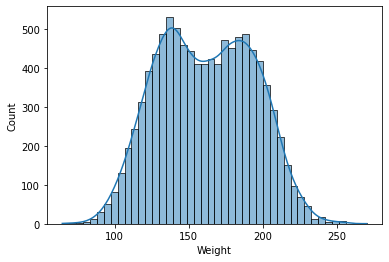

In [ ]:
sns.histplot(df['Weight'],kde=True)

In [ ]:
mean_w=df['Weight'].mean()

In [ ]:
mean_w

161.44035683283076

In [ ]:
std_w=df['Weight'].std()
std_w

32.108439006519546

In [ ]:
std_3=mean_w+(3*std_w)
std_3

257.7656738523894

In [ ]:
std_n3=mean_w-(3*std_w)
std_n3

65.11503981327212

In [ ]:
df[df['Weight']>std_3]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [ ]:
df1=df[(df.Weight>std_3) | (df.Weight<std_n3)]
df1

,Gender,Height,Weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


In [ ]:
df2=df[(df.Weight<std_3) & (df.Weight>std_n3)]
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


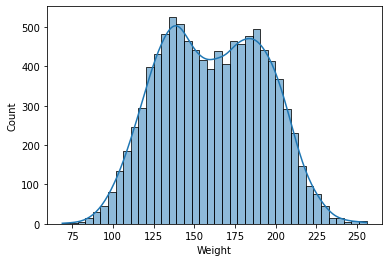

In [ ]:
sns.histplot(df2['Weight'],kde=1)

In [ ]:
x=df2.drop('Height',axis=1)

In [ ]:
x

,Gender,Weight
0,Male,241.893563
1,Male,162.310473
2,Male,212.740856
3,Male,220.042470
4,Male,206.349801
...,...,...
9995,Female,136.777454
9996,Female,170.867906
9997,Female,128.475319
9998,Female,163.852461


In [ ]:
y=df2['Height']
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 9998, dtype: float64

In [ ]:
x2=x['Gender']
x2

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
9995    Female
9996    Female
9997    Female
9998    Female
9999    Female
Name: Gender, Length: 9998, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [ ]:
w=label.fit_transform(x2)

In [ ]:
w

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
x['Gender']=w
x.Gender

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Gender, Length: 9998, dtype: int64

In [ ]:
x

,Gender,Weight
0,1,241.893563
1,1,162.310473
2,1,212.740856
3,1,220.042470
4,1,206.349801
...,...,...
9995,0,136.777454
9996,0,170.867906
9997,0,128.475319
9998,0,163.852461


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kr=KNeighborsRegressor(n_neighbors=99)


In [ ]:
kr.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=99)

In [ ]:
kr.score(xtest,ytest)

0.8525615692402784

In [ ]:
kr.predict([[1,241.893563]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([74.52102634])

In [ ]:
prd=kr.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix


In [ ]:
mean_squared_error(prd,ytest)

2.1577492143882777

In [ ]:
r2_score(prd,ytest)

0.8224248794594915